<a href="https://colab.research.google.com/github/omkardesai98/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Sumit Berde
##### **Team Member 2 -** Omkar Desai
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


## Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The main aim of the project is to make prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [125]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setting max display column limit to 20
pd.set_option("display.max_columns", 20)

#set style
plt.style.use('seaborn')


# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')

In [126]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [127]:
# Load Dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/cohort-chicago/Capston Project ML 1/SeoulBikeData.csv'

df = pd.read_csv(file_path,encoding = 'latin')

### Dataset First View

In [128]:
# Checking first 5 rows
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [129]:
# Checking last 5 rows
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [130]:
# Dataset Rows & Columns count
print(f'Total rows are: {df.shape[0]} ')
print(f'Total columns are: {df.shape[1]} ')

Total rows are: 8760 
Total columns are: 14 


### Dataset Information

In [131]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [132]:
# Renaming columns to remove units 
df = df.rename(columns={'Rented Bike Count':'Rented_bike_count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility',
                   'Dew point temperature(°C)':'Dew_point_temperature','Solar Radiation (MJ/m2)':'Solar_radiation','Rainfall(mm)':'Rainfall',
                   'Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_day'})

#### Duplicate Values

In [133]:
# Dataset Duplicate Value Count
print(f'The number of duplicate rows are {df.duplicated().sum()}')

The number of duplicate rows are 0


#### Missing Values/Null Values

In [134]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                     0
Rented_bike_count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_day          0
dtype: int64

In [135]:
df.head()

,Date,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


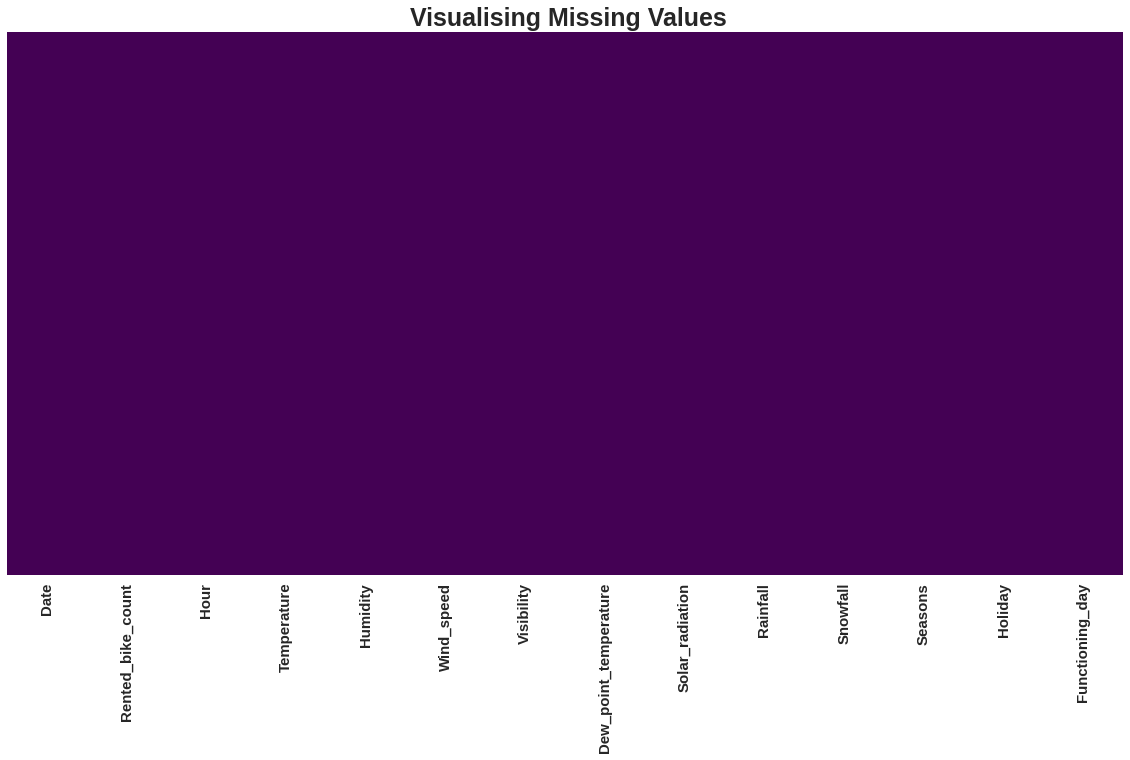

In [136]:
# Visualizing the missing values
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),cmap="viridis",yticklabels=False,cbar=False)
plt.title(" Visualising Missing Values");

### What did you know about your dataset?

### The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>




## ***2. Understanding Your Variables***

In [137]:
# Dataset Columns
print(df.columns)

Index(['Date', 'Rented_bike_count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_day'],
      dtype='object')


In [138]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented_bike_count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind_speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew_point_temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar_radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### Variables Description 



* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - Yes/No

### Check Unique Values for each variable.

In [139]:
# Check Unique Values for each variable.
for i in ['Hour','Seasons','Holiday','Functioning_day']:
  print(f'Unique values in {i} are {df[i].unique()}')


Unique values in Hour are [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Unique values in Seasons are ['Winter' 'Spring' 'Summer' 'Autumn']
Unique values in Holiday are ['No Holiday' 'Holiday']
Unique values in Functioning_day are ['Yes' 'No']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [140]:
def visibility_bin(x):
  '''creating bin for snow visibility'''
  try:
      if x['Visibility'] <= 500 :
        return 'heavy snow'
      elif x['Visibility'] > 1000 :
          return 'light snow'
      else:
          return 'medium snow'
  except:
    print('something is wrong')

In [141]:
#creating bin for visibility feature as snowfall and visibility have relation as they both depend on each other 
df['visibility_bin'] = df.apply(lambda x : visibility_bin(x),axis = 1)

In [142]:
df.head()

,Date,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day,visibility_bin
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,light snow
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,light snow
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,light snow
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,light snow
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,light snow


In [143]:
# Dropping columns Visibility
df.drop(columns=['Visibility'],axis=1,inplace=True)

# Dropping snowfall column as it has relationship with visibility. As snowfall is high,visibility is less and vice versa
df.drop(columns=['Snowfall'],axis=1,inplace=True)

In [144]:
df['visibility_bin'].value_counts()

light snow     6379
medium snow    1317
heavy snow     1064
Name: visibility_bin, dtype: int64

In [145]:
df.head()

,Date,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Dew_point_temperature,Solar_radiation,Rainfall,Seasons,Holiday,Functioning_day,visibility_bin
0,01/12/2017,254,0,-5.2,37,2.2,-17.6,0.0,0.0,Winter,No Holiday,Yes,light snow
1,01/12/2017,204,1,-5.5,38,0.8,-17.6,0.0,0.0,Winter,No Holiday,Yes,light snow
2,01/12/2017,173,2,-6.0,39,1.0,-17.7,0.0,0.0,Winter,No Holiday,Yes,light snow
3,01/12/2017,107,3,-6.2,40,0.9,-17.6,0.0,0.0,Winter,No Holiday,Yes,light snow
4,01/12/2017,78,4,-6.0,36,2.3,-18.6,0.0,0.0,Winter,No Holiday,Yes,light snow


In [146]:
# df['visibility_bin'].astype()

In [147]:
# Converting 'date' datatype to 'datetime' datatype
df['Date'] = pd.to_datetime(df['Date'])

# Extracting month from date column
df['Month']=df['Date'].dt.month

# Extracting day_name from date column
df['Day_name']=df['Date'].dt.day_name()

In [148]:
# Checking if it is a weekend or not using 'Day_name' column
df['Is_weekend']=df['Day_name'].apply(lambda x:1 if (x=='Saturday'or x=='Sunday') else 0)

In [149]:
# Droping columns 'Date' and 'Day_name' as we got required 'Is_weekend' column for analysis
df.drop(columns=['Date','Day_name'],axis=1,inplace=True)

In [150]:
# Checking value counts for categorical columns
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [151]:
# Checking value counts for categorical columns
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [152]:
# Checking value counts for categorical columns
df['Functioning_day'].value_counts()

Yes    8465
No      295
Name: Functioning_day, dtype: int64

In [153]:
# Checking value counts for categorical columns
df['Month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

In [154]:
# Checking value counts for categorical columns
df['Is_weekend'].value_counts()

0    6216
1    2544
Name: Is_weekend, dtype: int64

In [155]:
# Creating numeric features list from dataset
num_features = df.describe().columns.to_list()

# Deleting 'Month' and 'Is_weekend' from num_features as they are categorical features
del num_features[-1:-3:-1]

# Creating categorical features list from dataset
cat_features = set(df.columns)-set(num_features)

print(f'Numeric features are {num_features}')
print(f'Categorical features are {cat_features}')

Numeric features are ['Rented_bike_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Dew_point_temperature', 'Solar_radiation', 'Rainfall']
Categorical features are {'Month', 'Is_weekend', 'visibility_bin', 'Functioning_day', 'Seasons', 'Holiday'}


In [156]:
df.head()

,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Dew_point_temperature,Solar_radiation,Rainfall,Seasons,Holiday,Functioning_day,visibility_bin,Month,Is_weekend
0,254,0,-5.2,37,2.2,-17.6,0.0,0.0,Winter,No Holiday,Yes,light snow,1,0
1,204,1,-5.5,38,0.8,-17.6,0.0,0.0,Winter,No Holiday,Yes,light snow,1,0
2,173,2,-6.0,39,1.0,-17.7,0.0,0.0,Winter,No Holiday,Yes,light snow,1,0
3,107,3,-6.2,40,0.9,-17.6,0.0,0.0,Winter,No Holiday,Yes,light snow,1,0
4,78,4,-6.0,36,2.3,-18.6,0.0,0.0,Winter,No Holiday,Yes,light snow,1,0


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### 1. Plotting barplot for each 'categorical variable' with respect to the target variable 'rental_bike_count'

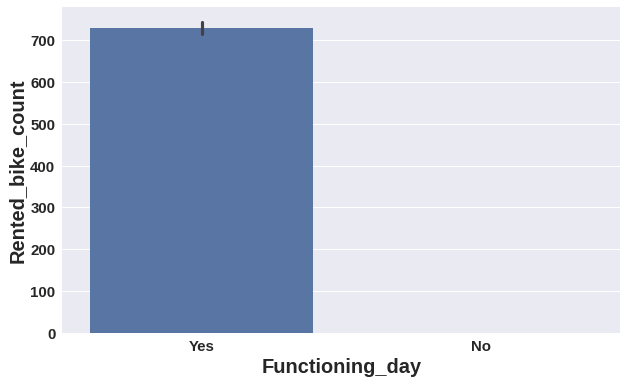

In [157]:
# Barplot between 'Functioning_day' and 'Rented_bike_count'
plt.figure(figsize=(10,6))
sns.barplot(x=df['Functioning_day'],y=df['Rented_bike_count']);

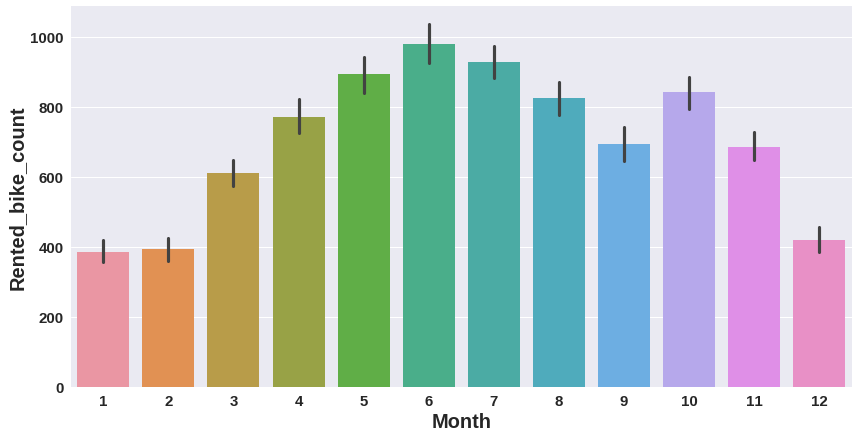

In [158]:
# Barplot between 'Month' and 'Rented_bike_count'
plt.figure(figsize=(14,7))
sns.barplot(x=df['Month'],y=df['Rented_bike_count']);

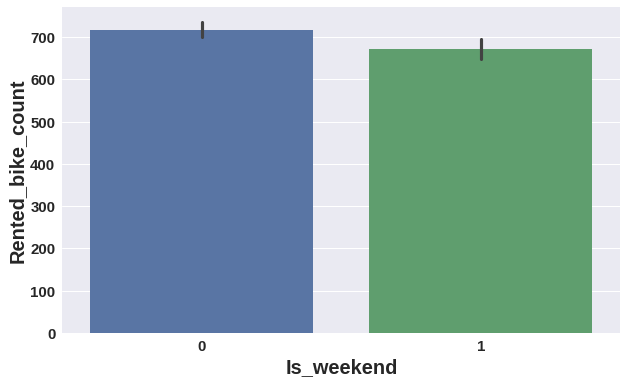

In [159]:
# Barplot between 'Is_weekend' and 'Rented_bike_count'
plt.figure(figsize=(10,6))
sns.barplot(x=df['Is_weekend'],y=df['Rented_bike_count']);

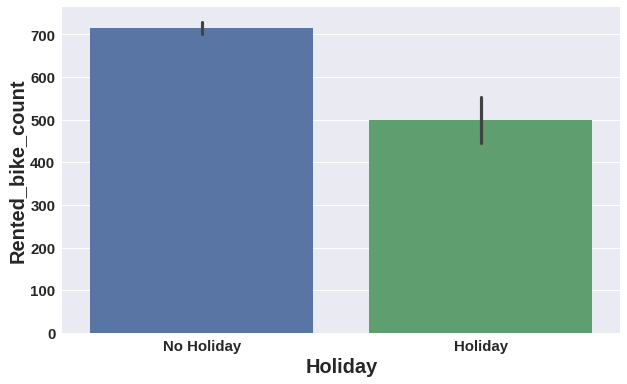

In [160]:
# Barplot between 'Holiday' and 'Rented_bike_count'
plt.figure(figsize=(10,6))
sns.barplot(x=df['Holiday'],y=df['Rented_bike_count']);

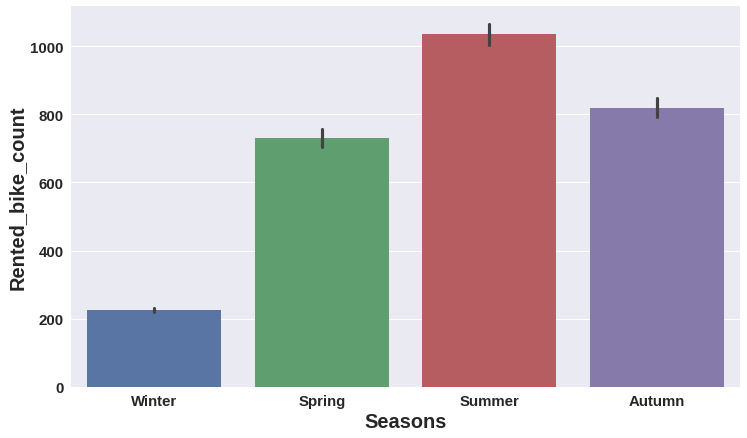

In [161]:
# # Barplot between 'Seasons' and 'Rented_bike_count'
plt.figure(figsize=(12,7))
sns.barplot(x=df['Seasons'],y=df['Rented_bike_count']);

##### 1. Why did you pick the specific chart?

A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis, and we see that it creates a plot taking a mean per categorical column.

##### 2. What is/are the insight(s) found from the chart?

1.  On 'No functioning' day no bike was rented
2. From March bike rent count increases and it was highest in June.
3. Bike rented were more or less same on weekdays and weekends.
4. Bike rented on 'No Holiday' were more than on 'Holidays'.
5. In summer season most bikes were rented and in winter least bikes were rented      

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. On 'Non Functioning' day,looks like the company had closed the business on maintainance purposes hence no bikes were rented.
2. Bikes rented are more on 'No Holiday' as people travel to reach their offices.This gives an indication to open bike rental outlets near railway stations where people need to travel further using buses from the railway station to reach their offices. 
3. People don't like to rent bikes in winter season due to snowfall and rainfall.

#### 2. Plotting regreesion plot between 'Numeric features' and target variable 'Rented_bike_count'

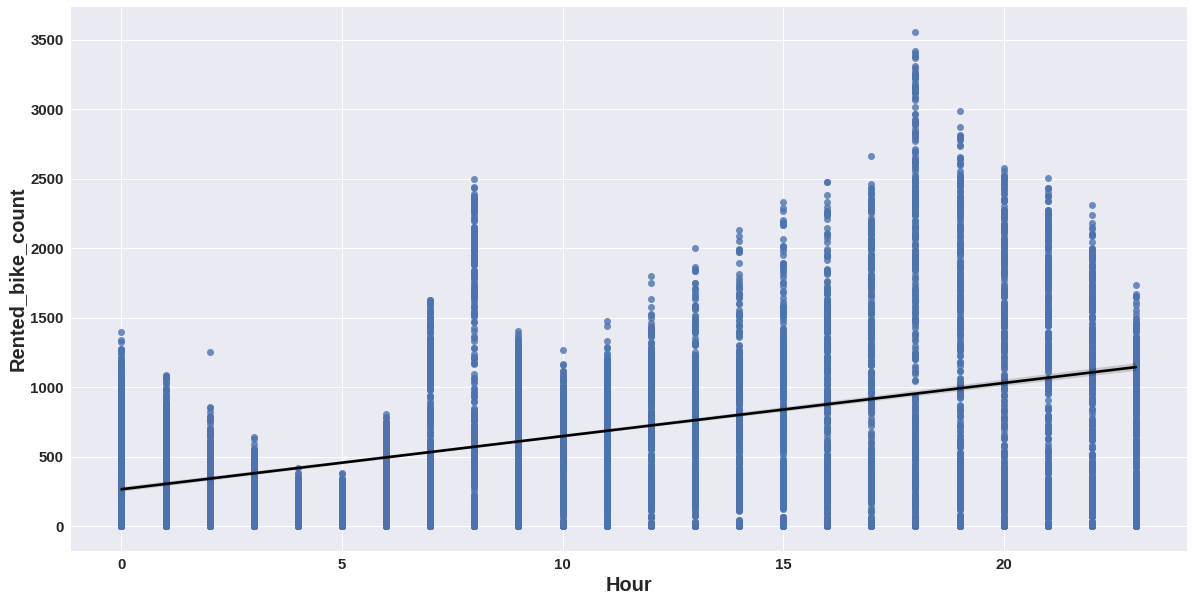

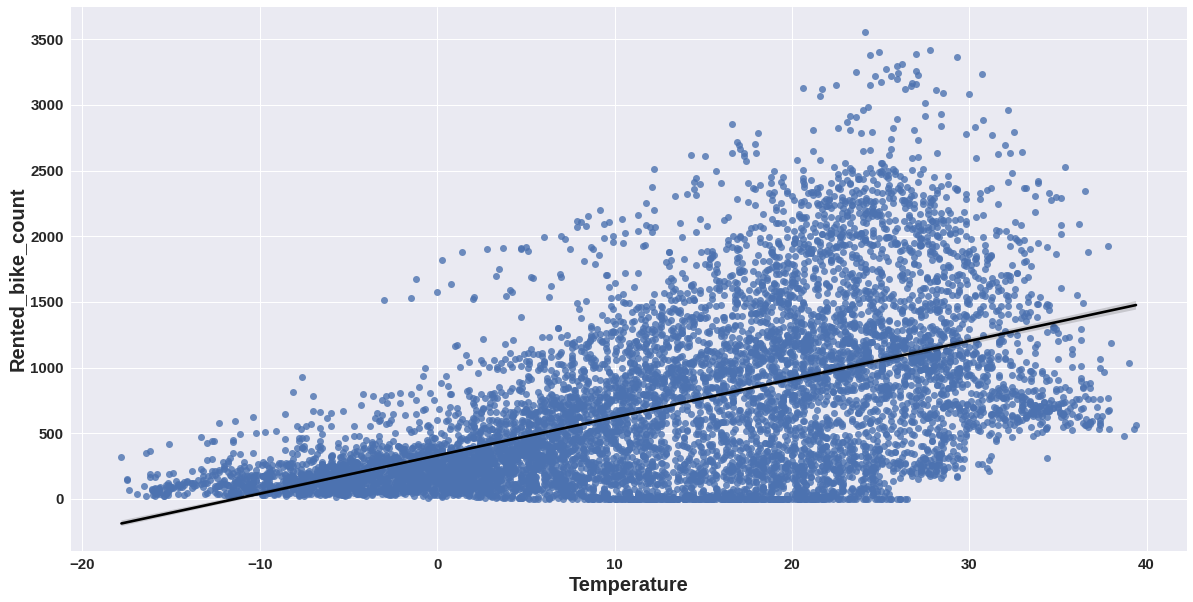

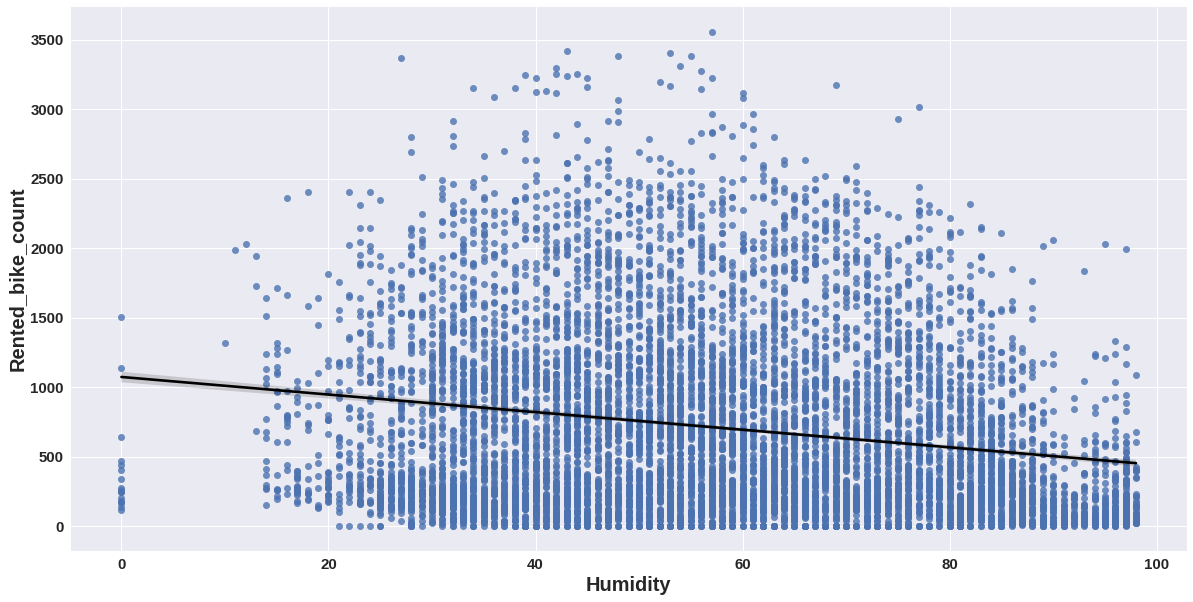

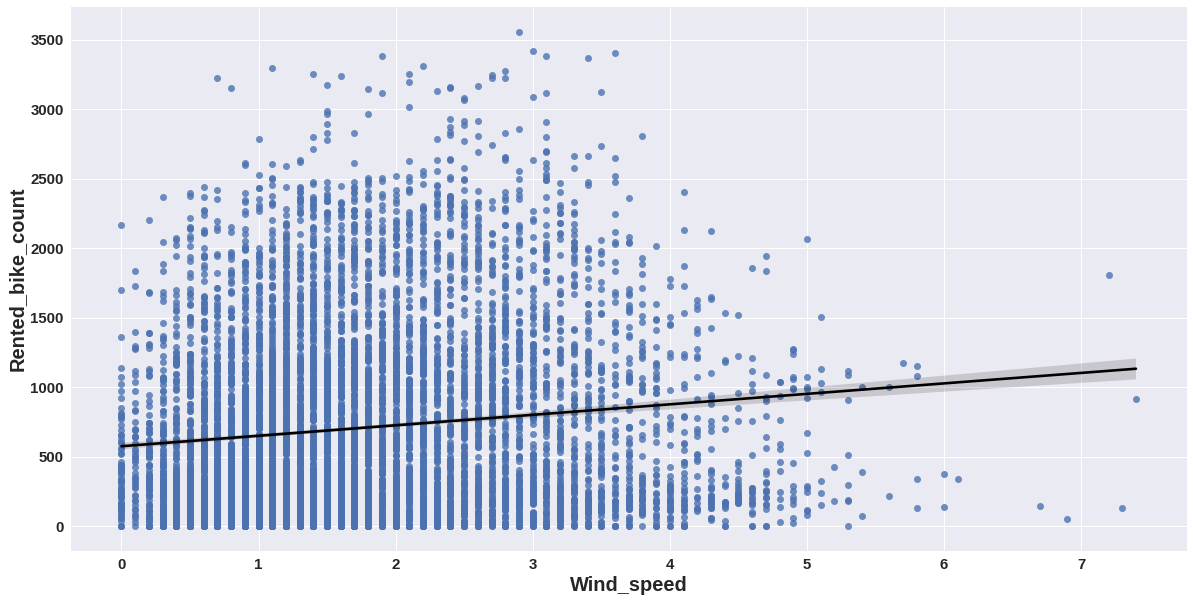

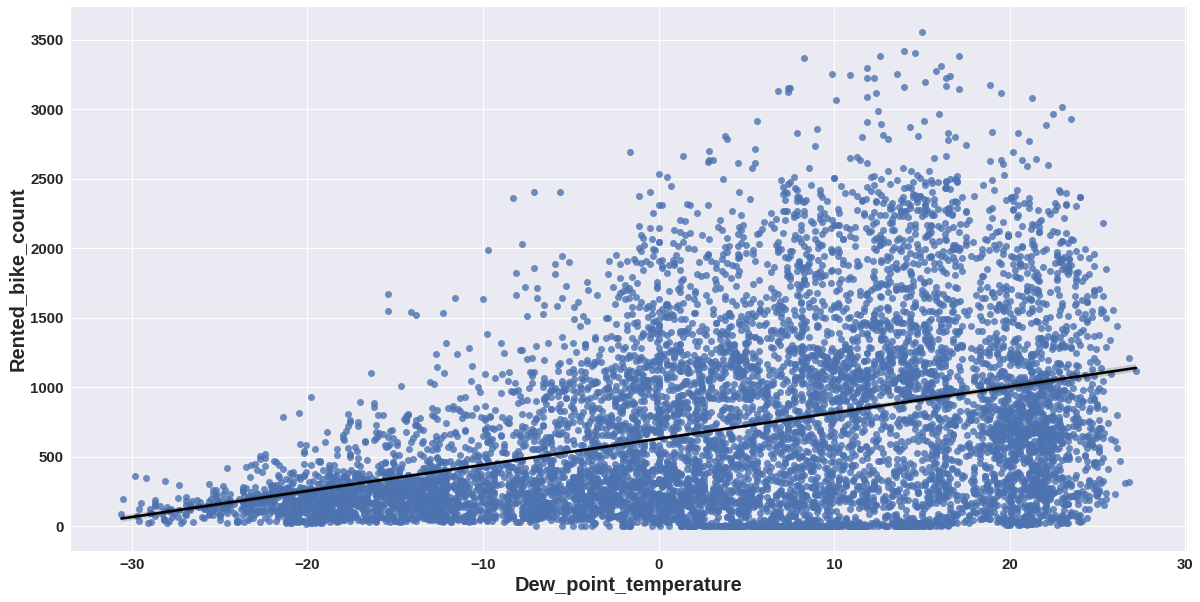

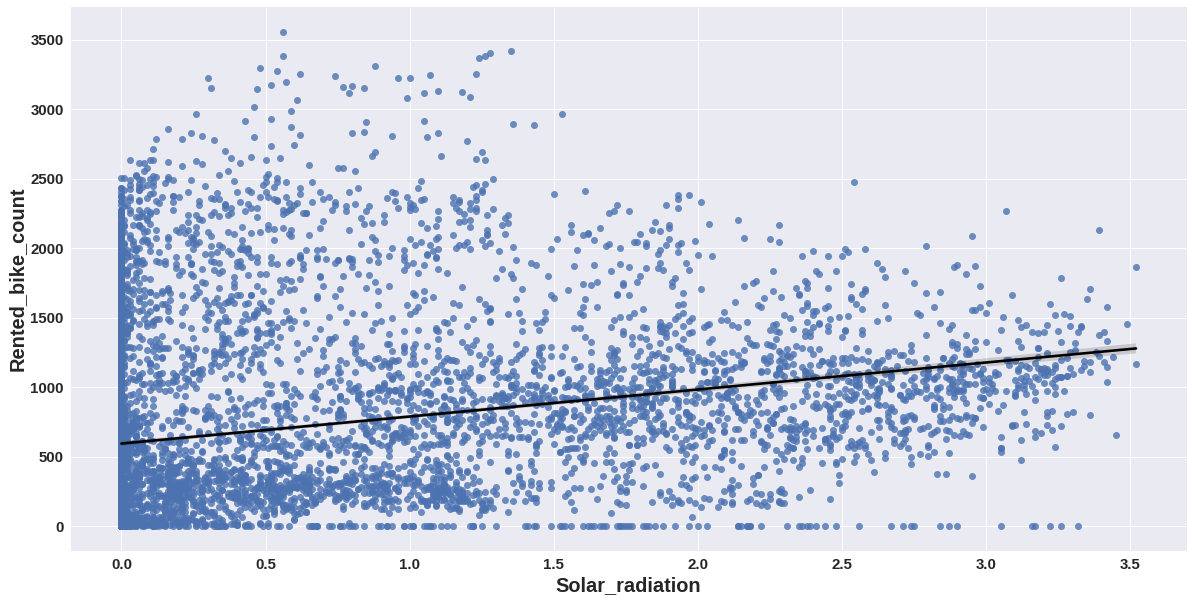

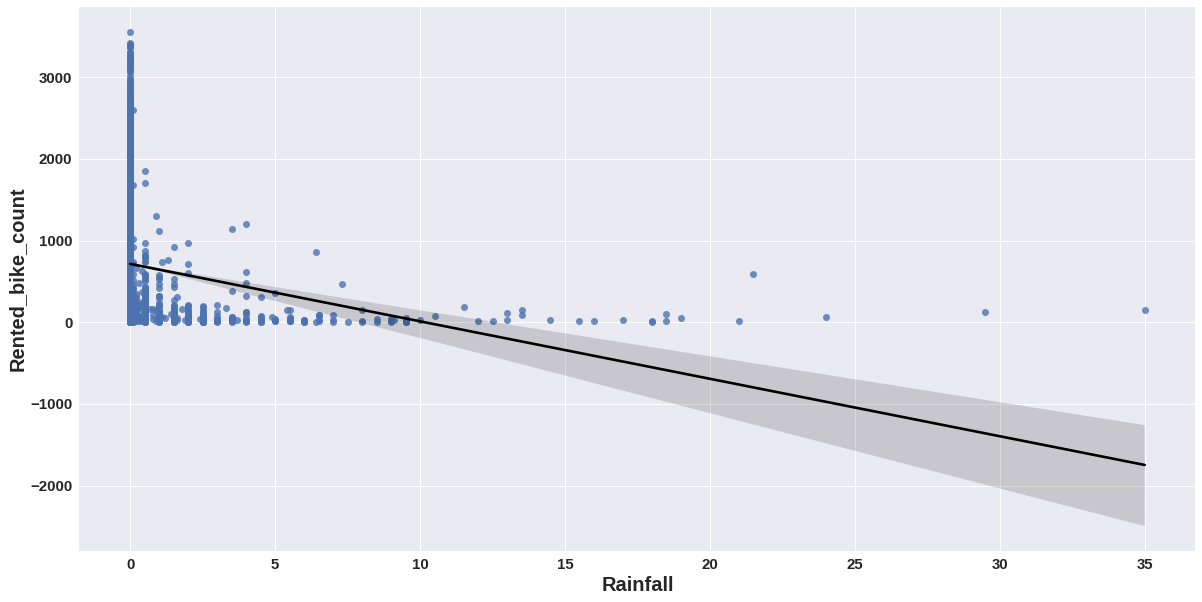

In [162]:
# Plotting regression line between 'Numeric features' and 'Rented_bike_count' to check linearity
for col in num_features[1:]:
 plt.figure(figsize=(20,10))
 sns.regplot(x=df[col],y=df['Rented_bike_count'],line_kws={'color':'black'})

##### 1. Why did you pick the specific chart?

Regression plot is plotted between continuous variables to check wheather linearity exist or not and tries to fit the best line possible   

##### 2. What is/are the insight(s) found from the chart?

1. Some kind of linearity exists between 'rented_bike_count' and 'temperature'.As temperature increases rented_bike_count also increases. People don't like to rent bike in cold temperatures which is shown above where rented_bike_count is less in winter.
2. Very little linearity exist between 'rented_bike_count' and 'humidity','wind_speed','visibility' and 'solar_radiation'.
3. Some linearity exist between 'rented_bike_count' and 'dew_point_temperature'.Same relationship as temperature.
4. Strong relationship exist between 'rented_bike_count' and 'rainfall' and 'snowfall'. As snowfall increases rented_bike_count decreases, same indication as less bike counts in winter. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Only 'temperature','dew_point_temperature' shows some kind of linear relationship.
2. Every other column is not linearly dependent on target variable.
3. Thus linear model will have less accuracy as only few columns show linear relationship.

#### 3. Plotting Pointplot to check variation of 'rented_bike_count' with respect to 'hour of the day' taking categorical columns into consideration. 

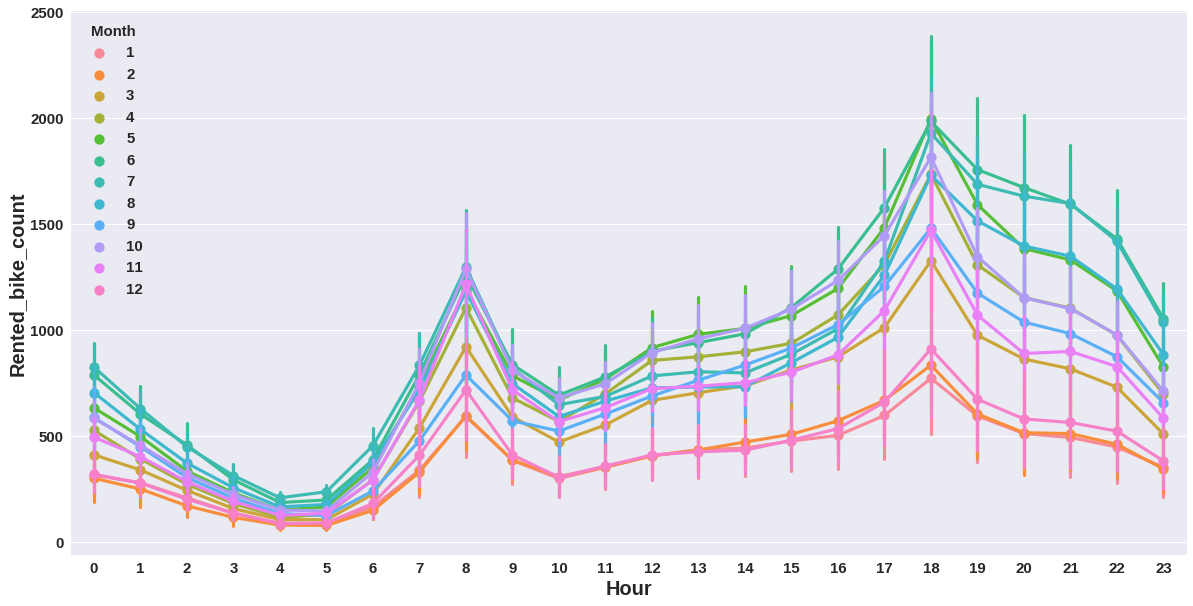

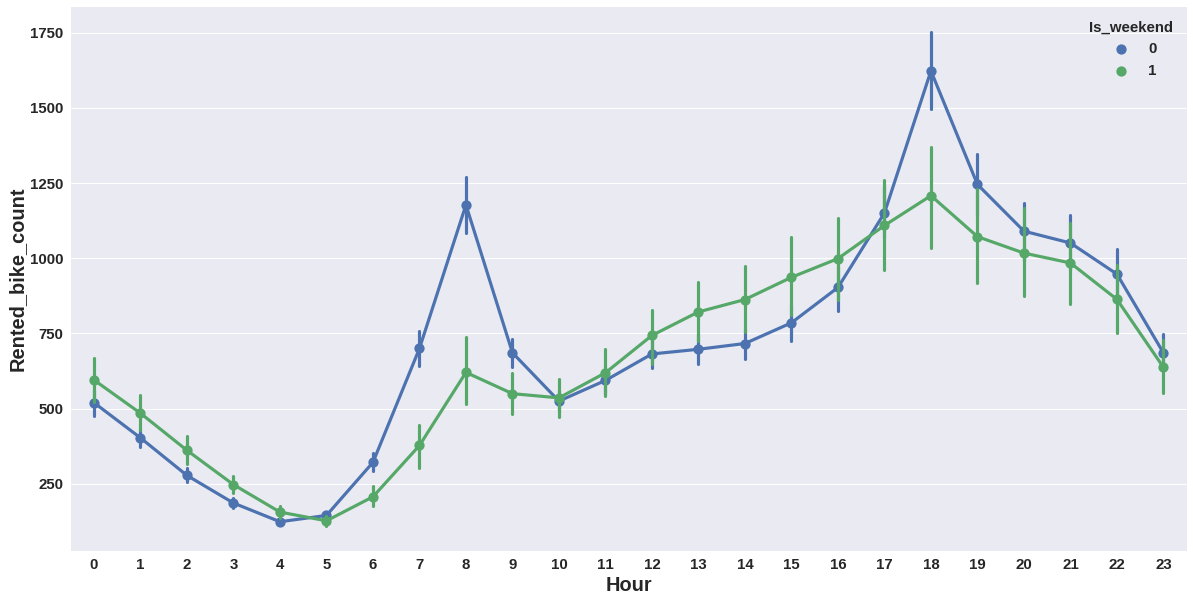

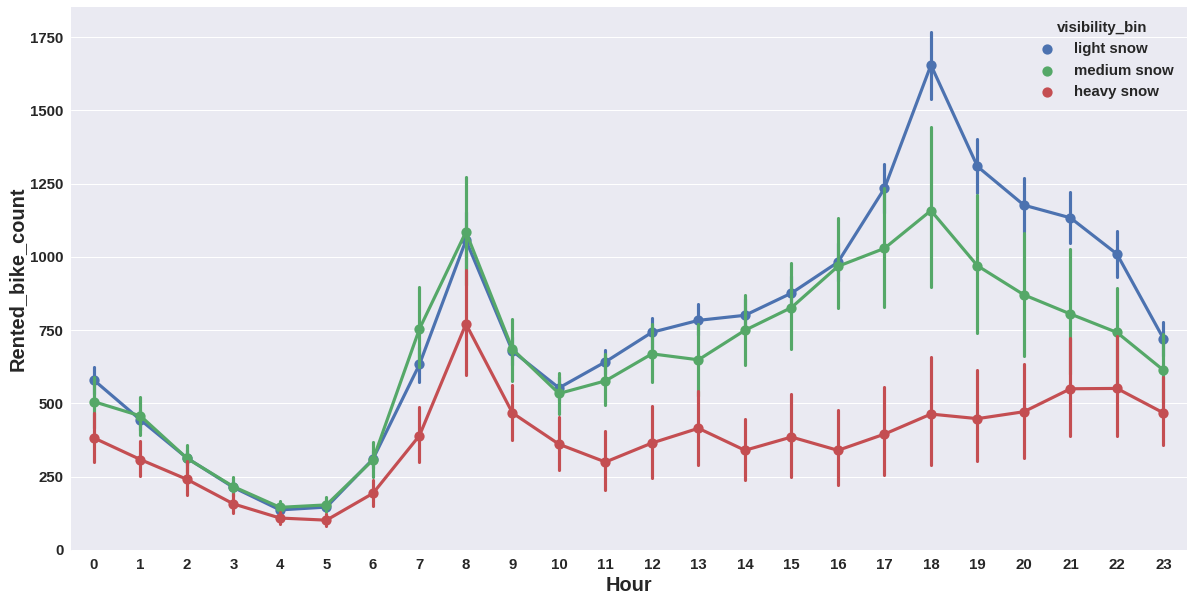

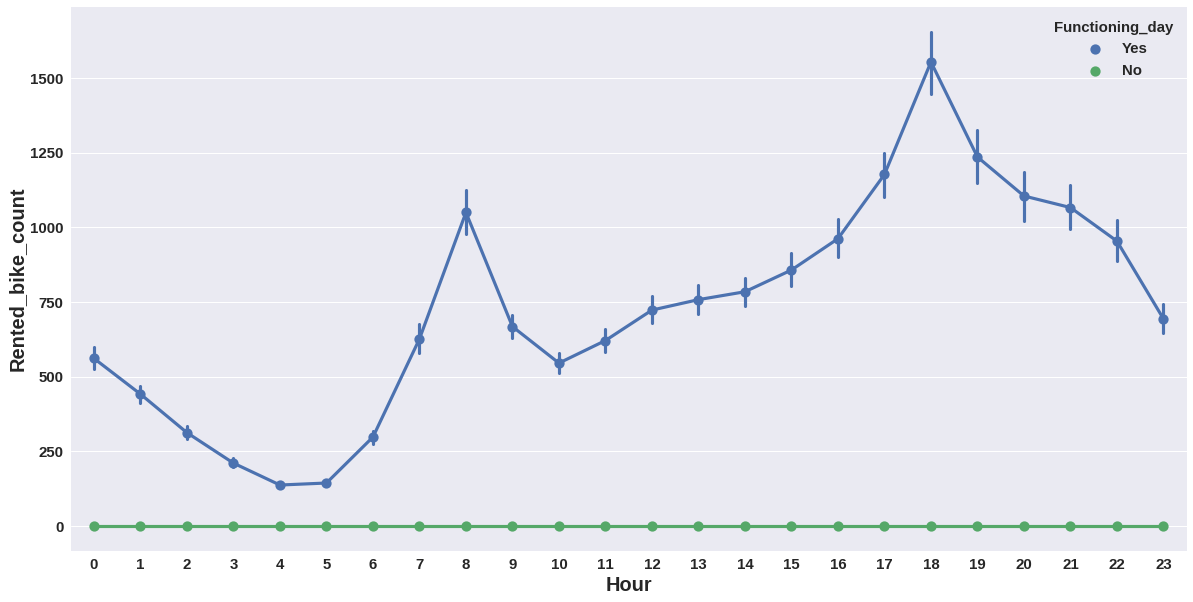

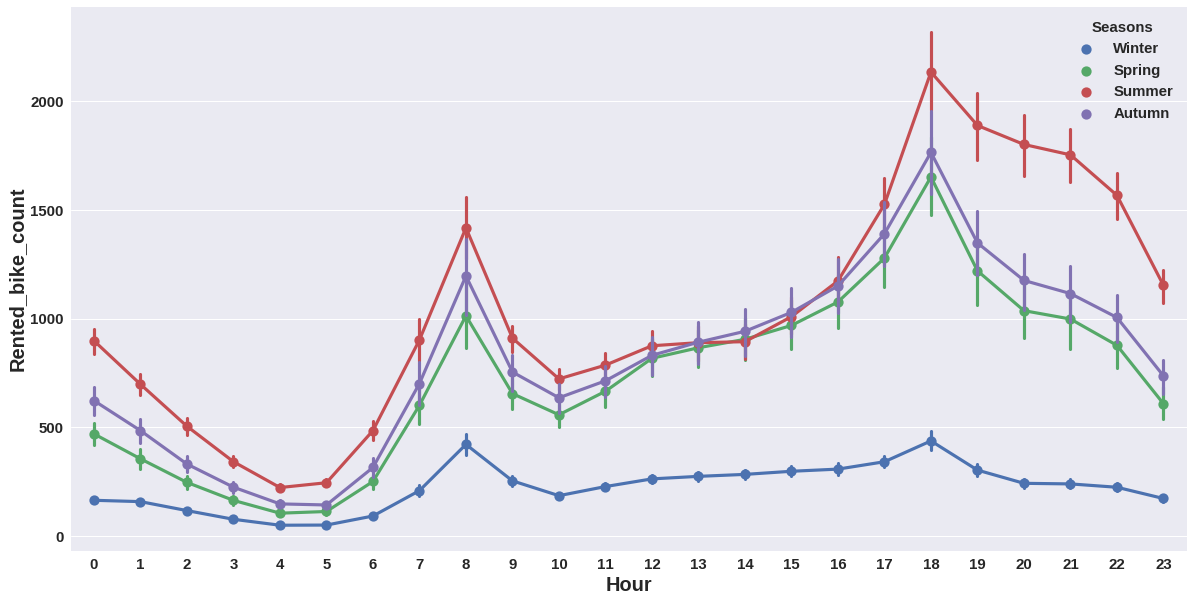

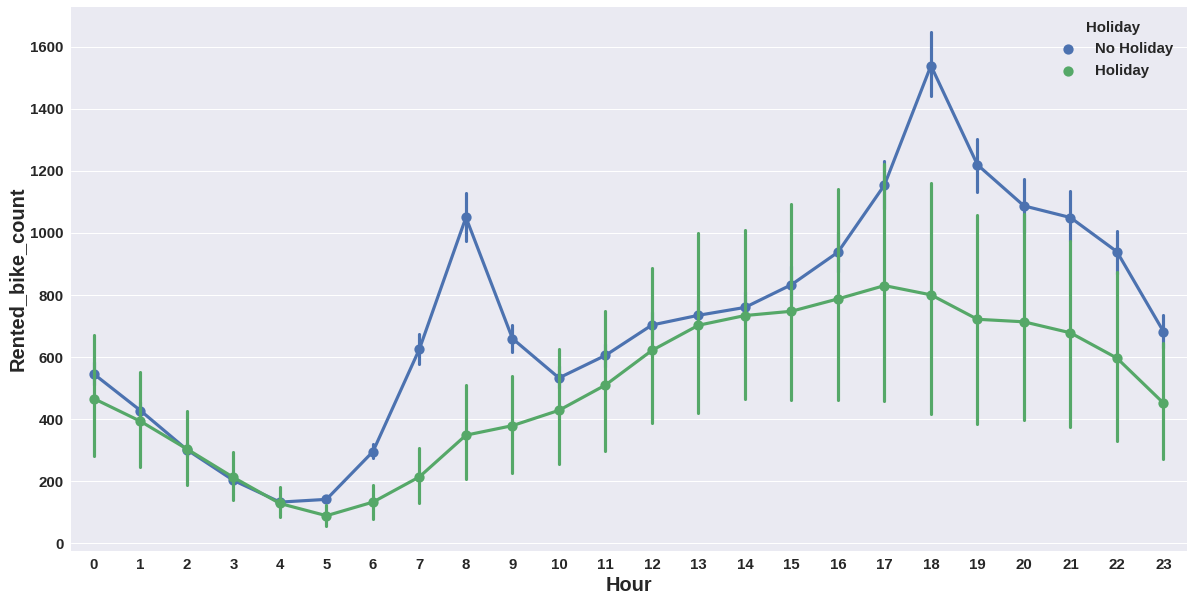

In [163]:
# Chart - 3 visualization code
for col in cat_features:
 plt.figure(figsize=(20,10))
 sns.pointplot(x=df['Hour'],y=df['Rented_bike_count'],hue=df[col])

##### 1. Why did you pick the specific chart?

Point plot helps to visualize the trends in 'rented_bike_count' per hour basis with respect to different categorical columns

##### 2. What is/are the insight(s) found from the chart?

1. It is clear that maximum bikes are rented during office opening and closing hrs.
2. Maximum bikes are rented during night time from 5PM to 10PM.Same trend as be observed in different seasons(winter having the lowest bike rental counts),across months,across non holidays and across weekends.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Best time for bike rental business is during summer season from 5PM to 10PM during the night time.

#### 4. Plotting distribution plot to check 'Numeric features' distribution 

Analyze Numerical Data

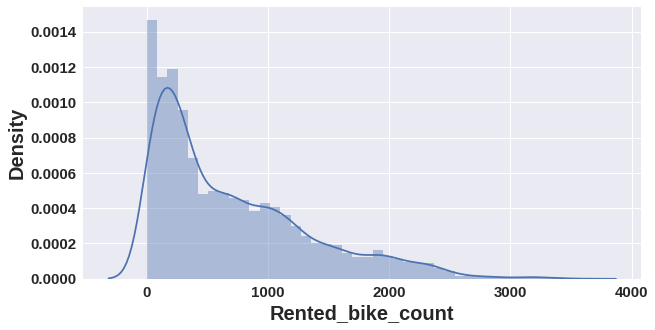

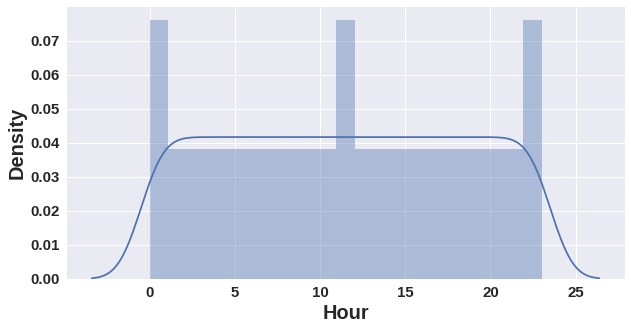

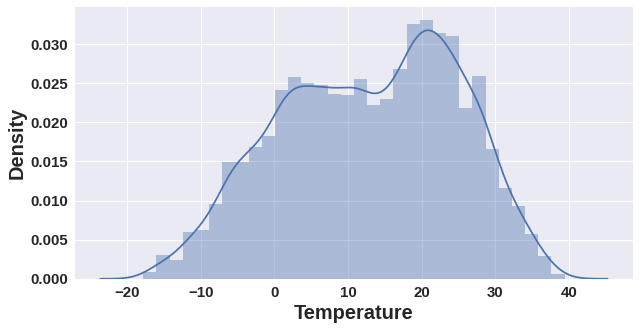

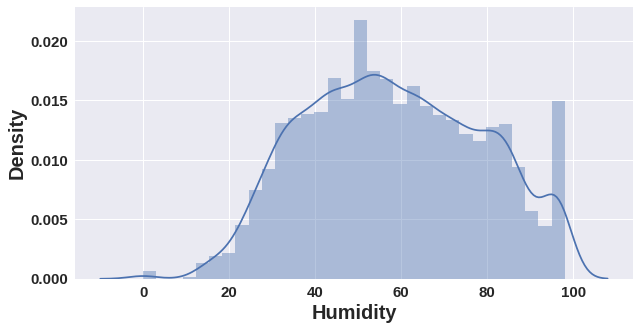

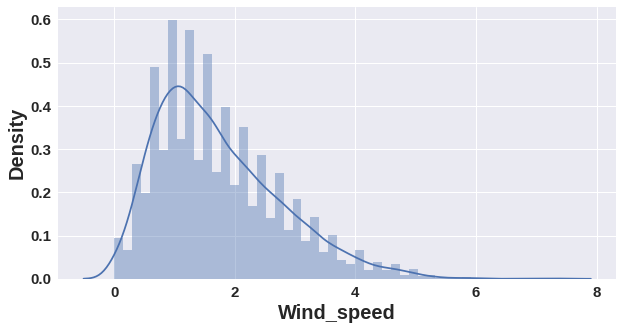

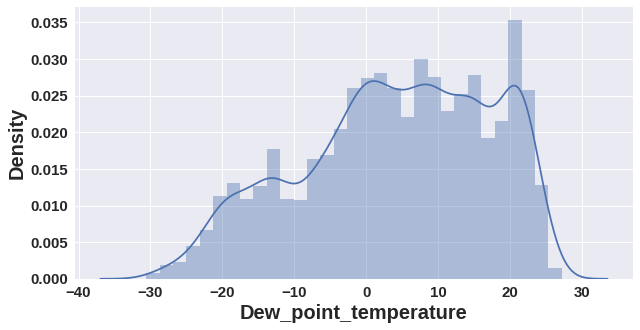

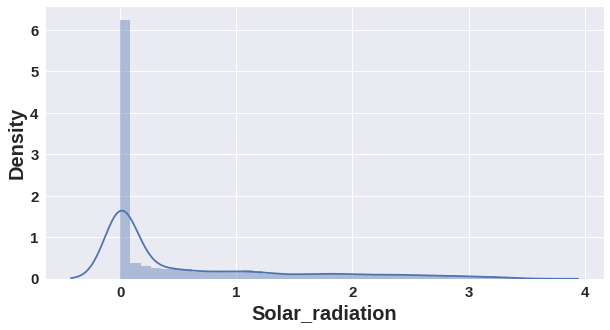

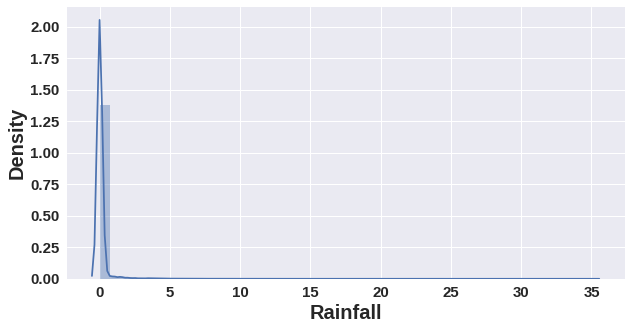

In [164]:
# Chart - 4 visualization code
for i in num_features :
  plt.figure(figsize=(10,5))
  sns.distplot(x=df[i])
  plt.xlabel(i)
plt.show()

##### 1. Why did you pick the specific chart?

Answer : 

1.  Numerical data is a data type expressed in numbers,rather than natural language description.Sometimes called quantitative data.

2.  we pick these chart so that we get to know whether our numerical features 
are positively skewed or not and how was our features distribution.



##### 2. What is/are the insight(s) found from the chart?

Answer :
1.   We can see from chart that rented bike count ,Rainfall,Solar_radiation 
,Wind_speed features are positively skewed. 
2.   Dew_point_temperature,Temperature,Humidity this are features are
normally distributed.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer:

1.   As the Rented_bike_count feature is positively skewed hence there might be outliers which may affect our model accuracy, and we should take care of those.
2.   Temperature and Humidity columns are normally distributed; hence, these columns are most useful during model training.



#### 5. Plotting barplot to visualize how 'snowfall' affects 'rented_bike_count'

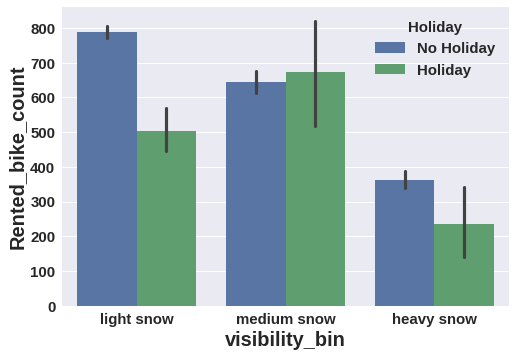

In [165]:
# Chart - 5 visualization code
# creating barplot to see relation between visibility_bin,Holiday column with Rented_bike_count
sns.barplot(x=df['visibility_bin'],y=df['Rented_bike_count'],hue = df['Holiday'])

##### 1. Why did you pick the specific chart?


Answer Here.
1.   barplot give better visualization to give relation between two or more column






##### 2. What is/are the insight(s) found from the chart?

Answer Here : 

1.   During light snow and office working days there is high number of bikes are rented.
2.   In case of medium snow day almost equal number of bikes are rented whether it is holiday or not.Also if it is medium snow day and holiday people loved to go outside on bike as compared to ligh & heavy snow day holiday.

2.   during heavy snow very less people rent the bike.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here 
1. As the snowfall is less,visibility is high so rented_bike_count is high.
2. As the snowfall is high,visibility is less so rented_bike_count is low.

#### 6. Plotting boxplot to check outliers between categorical variables

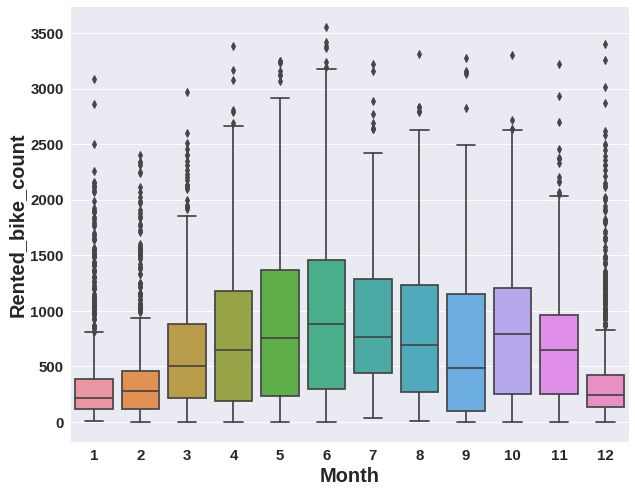

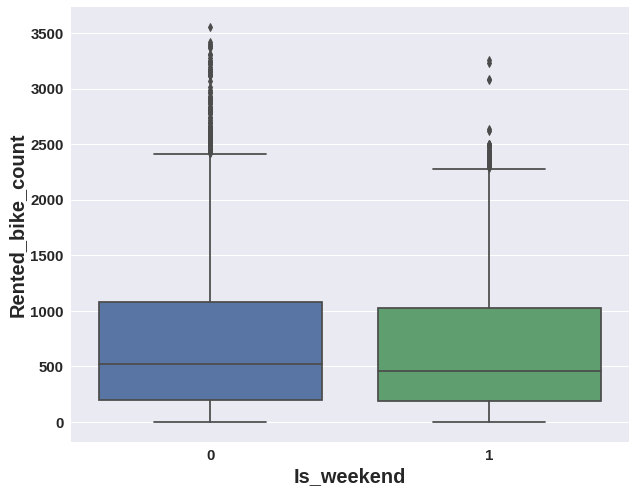

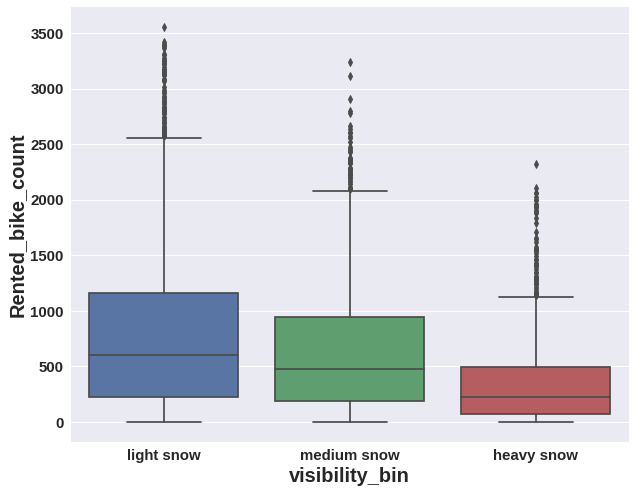

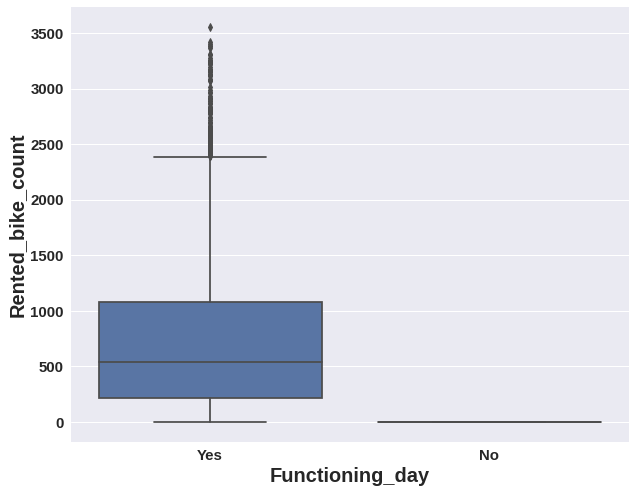

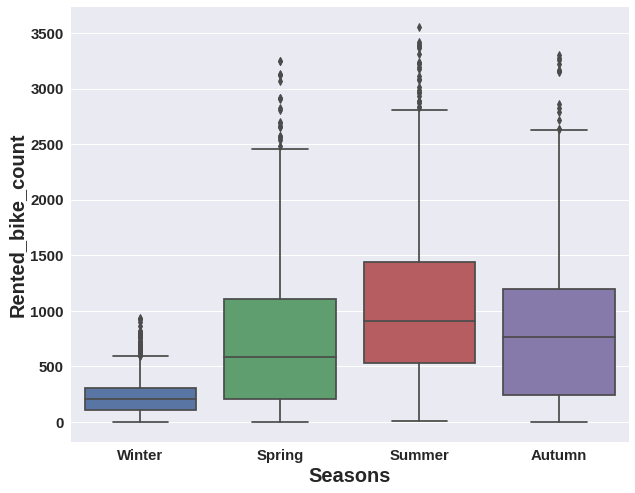

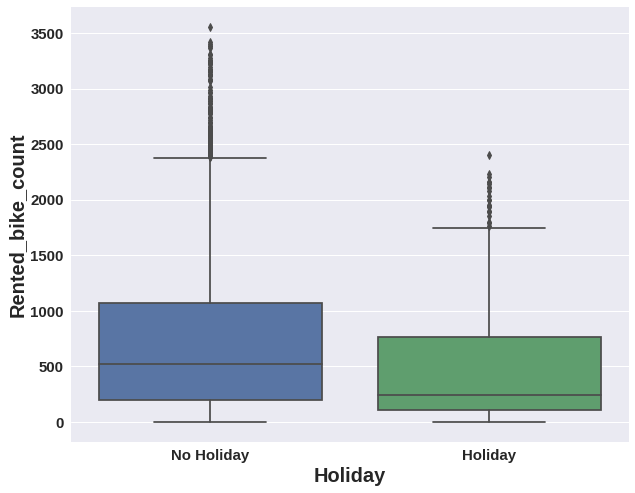

In [166]:
# plotting boxplot for categeorical features 
for col in cat_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df['Rented_bike_count']);

##### 1. Why did you pick the specific chart?

Answer Here.

1.   Boxplot is used to check the outliers




##### 2. What is/are the insight(s) found from the chart?

Answer Here
1. Except for feature 'Hour' every other categorical feature has outliers.
2. We will deal with it later.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
1.   Gained insights help to understand during outlier removal which features we should care most.


#### 7. Correlation Heatmap

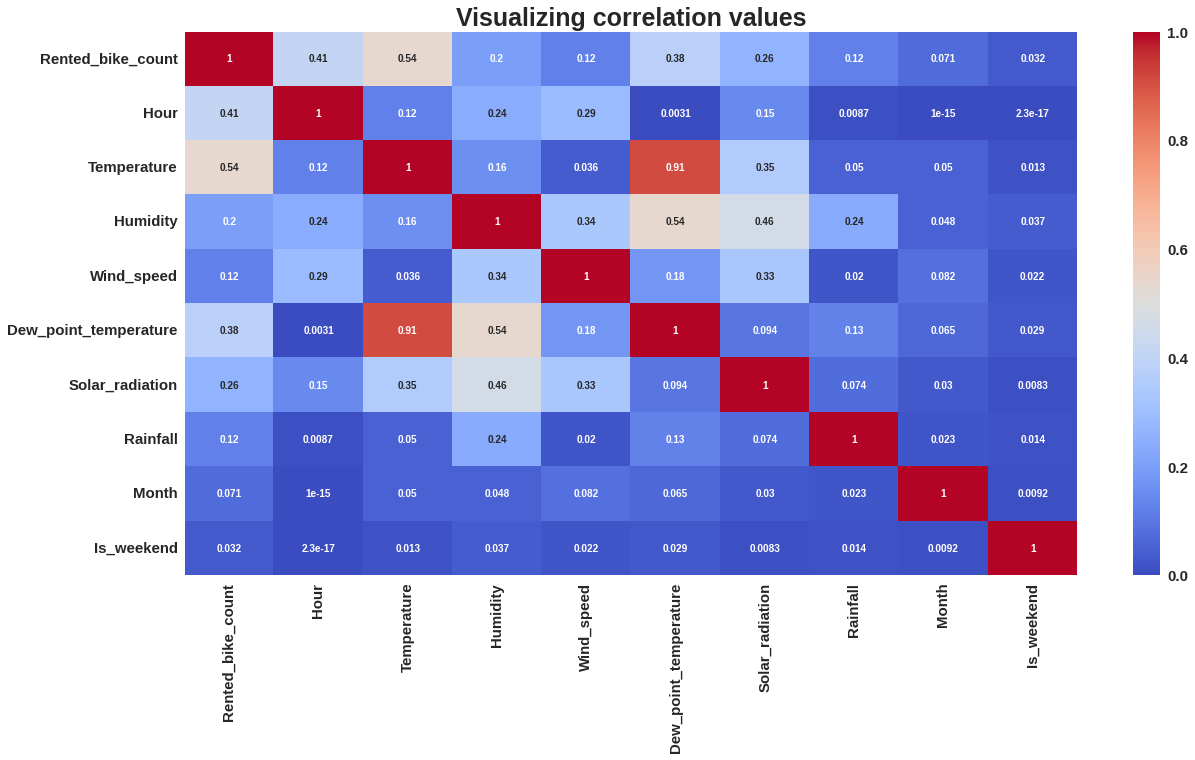

In [167]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,10))
sns.heatmap(abs(df.corr()),cmap='coolwarm',annot=True)
plt.title("Visualizing correlation values");

##### 1. Why did you pick the specific chart?

Heatmap helps to visualize the Pearsons correlation coeffient properly

##### 2. What is/are the insight(s) found from the chart?

1. 'Temperature' and 'Dew_point_temperature' are highly correlated.
2. 'Humidity' and 'Visibility','Humidity' and 'Dew_point_temperature','Humidity' and 'Solar Radiation' are highly correlated to eachother.
3. Target variable 'Rented_bike_count' is highly correlated to 'hour' and 'temperature' which means these are important features. 

#### Chart - 15 - Pair Plot 

In [168]:
# Pair Plot visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. When Humidity percentage is between 40% to 60% then rented bike count is more than 1000

Answer Here.


*   Null Hypothesis : N = 1000
*   Alternate Hypothesis : N >1000
*   Test Type : Right tailed test







#### 2. Perform an appropriate statistical test.

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### There is relationship between visibility_bin and Holiday.

*   Null Hypothesis (H0) : there is no relationship
*   Alternate Hypothesis (H1) : there is relationship
*   Test Type : Chi-square Test


#### 2. Perform an appropriate statistical test.

In [169]:
import scipy.stats as stats
from scipy.stats import chi2
df_chi = pd.crosstab(df['Holiday'],df['visibility_bin'])
print(df_chi)

visibility_bin  heavy snow  light snow  medium snow
Holiday                                            
Holiday                 49         318           65
No Holiday            1015        6061         1252


In [170]:

val = stats.chi2_contingency(df_chi)
Expected_values = val[3]

In [171]:
df_chi.values

array([[  49,  318,   65],
       [1015, 6061, 1252]])

In [172]:
#observed values
observed_val = df_chi.values
print('observed values :-\n',observed_val)

observed values :-
 [[  49  318   65]
 [1015 6061 1252]]


In [173]:
no_of_rows = len(df_chi.iloc[:,0])
no_of_columns = len(df_chi.iloc[0,:])
ddof = (no_of_rows -1 )*(no_of_columns -1)
print("Degree of freedom: ",ddof)
alpha = 0.05

Degree of freedom:  2


In [174]:
#getting Chi_square value
chi_square = sum([(o - e)**2./e for o,e in zip(observed_val,Expected_values)])
chi_square_statistic = chi_square[0] + chi_square[1] + chi_square[2]
print('chi square statistic :',chi_square_statistic)
critical_value = chi2.ppf(q = 1 - alpha,df = ddof)
print('critical value:',critical_value)

chi square statistic : 0.280686123081101
critical value: 5.991464547107979


In [175]:
#p-value
p_value = 1- chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
if p_value <= alpha:
  print('Reject H0,There is a relationship between visibility_bin and Holiday')
else:
  print("Accept H0,There is no relationship between visibility_bin and Holiday")

p-value: 0.8690600431753459
Accept H0,There is no relationship between visibility_bin and Holiday


##### Which statistical test have you done to obtain P-Value?

We have used Chi2-Test as the statistical testing to obtain P-value and found the result that Null hypothesis is accepted. SO there is no relationship between Holiday and visibility_bin features.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [176]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

There were no missing values in the dataset

### 2. Handling Outliers

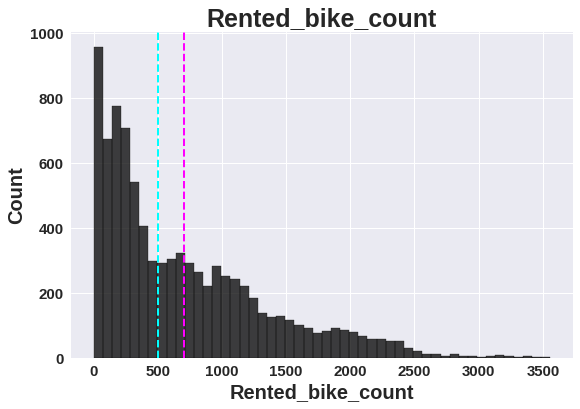

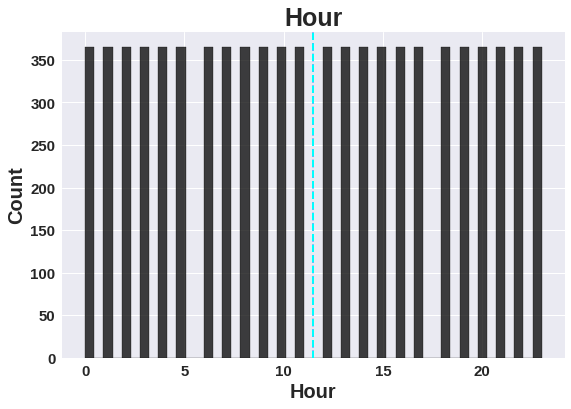

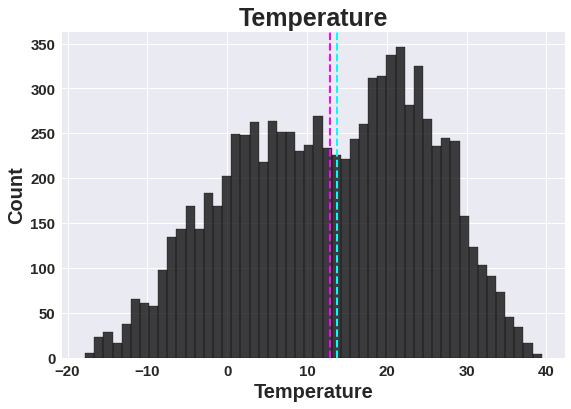

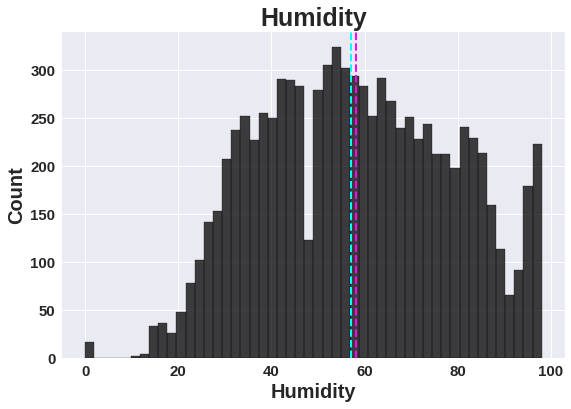

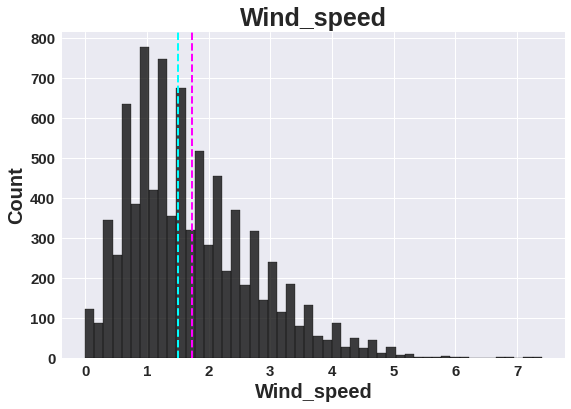

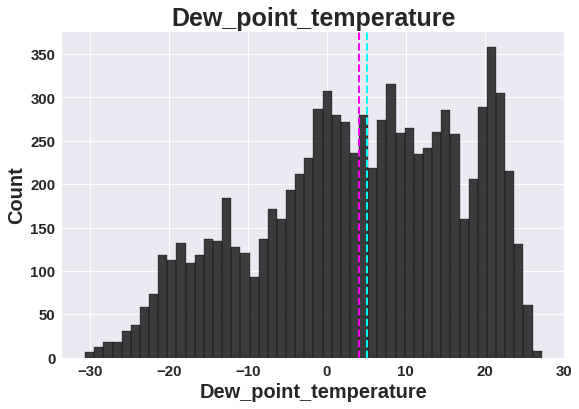

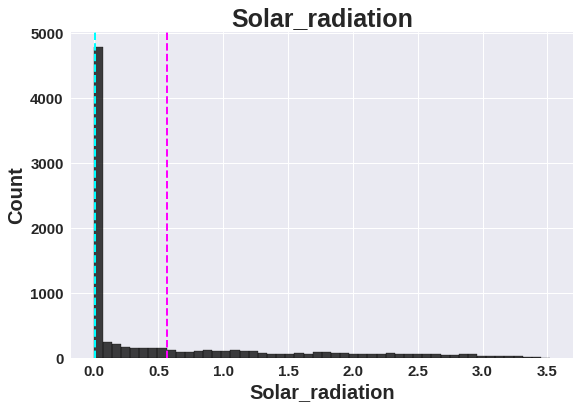

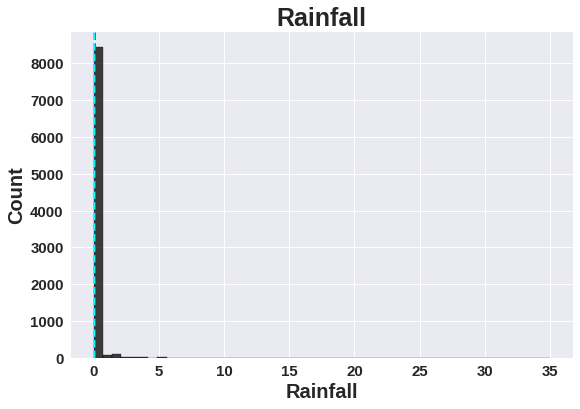

In [177]:
# Plotting histogram of numerical features
for col in num_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.histplot(x=df[col],color='black',ax=ax,bins=50)
    
    ax.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [178]:
#Finding the list of numerical column where data is skewed
skew_list = []
for i in num_features:
  if df[i].skew() > 1 :
    skew_list.append(i)

In [179]:
#list of numerical columns which are skewed
skew_list

['Rented_bike_count', 'Solar_radiation', 'Rainfall']

In [180]:
df['Rented_bike_count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented_bike_count, dtype: float64

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

In [181]:
# Removing outliers based on IQR as it is a skewed distribution

# Calucating IQR
IQR_rented_bike = df['Rented_bike_count'].quantile(0.75)-df['Rented_bike_count'].quantile(0.25)

# Calculating Lower and Upper bounds
lower_bridge_rented_bike = df['Rented_bike_count'].quantile(0.25) - IQR_rented_bike*(1.5)
upper_bridge_rented_bike = df['Rented_bike_count'].quantile(0.75) + IQR_rented_bike*(1.5)

# Removing outliers
df = df[df['Rented_bike_count'] <= upper_bridge_rented_bike]

In [182]:
df['Rented_bike_count'].shape

(8602,)

In [183]:
#capping - change the outlier values to upper (or) lower limit values
df['Rented_bike_count'] = np.where(df['Rented_bike_count']>upper_bridge_rented_bike,upper_bridge_rented_bike,np.where(df['Rented_bike_count']<lower_bridge_rented_bike,lower_bridge_rented_bike,df['Rented_bike_count']))

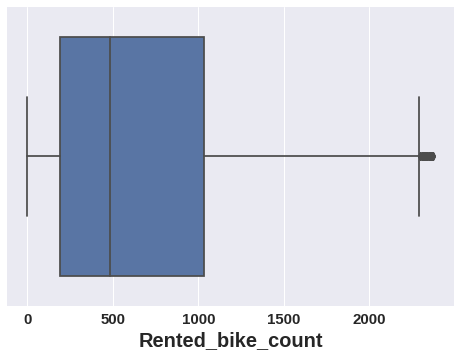

In [227]:
sns.boxplot(df['Rented_bike_count'])

In [243]:
#applyting Z-score method for Rainfall 
upper_limit_rain1 = df['Rainfall'].mean() +3*df['Rainfall'].std()
lower_limit_rain2 = df['Rainfall'].mean() -3*df['Rainfall'].std()

In [244]:
#applyting Z-score method for Solar_radiation
upper_limit_solar = df['Solar_radiation'].mean() +3*df['Solar_radiation'].std()
lower_limit_solar = df['Solar_radiation'].mean() -3*df['Solar_radiation'].std()

In [247]:
#capping - change the outlier values to upper (or) lower limit values for Solar_radiation
df['Solar_radiation'] = np.where(df['Solar_radiation']>upper_limit_solar,upper_limit_solar,np.where(df['Solar_radiation']<lower_limit_solar,lower_limit_solar,df['Solar_radiation']))
#capping - change the outlier values to upper (or) lower limit values for Rainfall
df['Rainfall'] = np.where(df['Rainfall']>upper_limit_rain1,upper_limit_rain1,np.where(df['Rainfall']<lower_limit_rain2,lower_limit_rain2,df['Rainfall']))

### 3. Categorical Encoding

In [185]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [186]:
# Expand Contraction

#### 2. Lower Casing

In [187]:
# Lower Casing

#### 3. Removing Punctuations

In [188]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [189]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [190]:
# Remove Stopwords

In [191]:
# Remove White spaces

#### 6. Rephrase Text

In [192]:
# Rephrase Text

#### 7. Tokenization

In [193]:
# Tokenization

#### 8. Text Normalization

In [194]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [195]:
# POS Taging

#### 10. Text Vectorization

In [196]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [197]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [198]:
# Select your features wisely to avoid overfitting
# Manipulate Features to minimize feature correlation and create new features

from statsmodels.stats.outliers_influence import variance_inflation_factor

def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [199]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_bike_count','Dew_point_temperature','Solar_radiation','Wind_speed']]])

,variables,VIF
0,Hour,2.843370
1,Temperature,2.245165
2,Humidity,4.731967
3,Rainfall,1.059488
4,Month,3.890664
5,Is_weekend,1.373742


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [200]:
# Transform Your data

### 6. Data Scaling

In [201]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [202]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [203]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [204]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [205]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [206]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [207]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [208]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [209]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [210]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [211]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [212]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [213]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [214]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***